In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('/content/cleandata.csv', delimiter = '\t')
df

<ipython-input-47-17081a0abdcf>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleandata.csv', delimiter = '\t')


,Unnamed: 0,id,created_at,country,source,status,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,attempt_charging,success_billing
0,2,1,2023-09-13 09:20:20.727,TH,ivr,0,1,6,25/08/2023 14:02,26/08/2023 00:00,25/08/2023 00:00,NaN,6,1,1
1,205756,1,2023-09-13 08:07:10.540,LA,USSD,-1,weekly,10000,21/07/2023 20:48,28/07/2023 20:48,NaN,22/07/2023 11:10,10000,1,1
2,287235,1,2023-09-14 06:55:21.260,OM,cp1,-1,daily,0,30/08/2022 09:18,30/08/2022 09:18,NaN,30/10/2022 03:07,300,1,0
3,200000,1,2023-09-13 09:19:41.923,SN,web,0,daily,0,13/08/2023 00:09,13/08/2023 00:09,NaN,9999-01-01 00:00:00.000,150,1,0
4,205750,2,2023-09-13 08:07:10.701,LA,USSD,-1,weekly,10000,24/07/2023 08:07,04/08/2023 07:10,NaN,03/08/2023 07:22,10000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,28592,7105868,2023-09-13 22:55:11.043,TH,wap,0,daily,0,13/09/2023 20:57,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308907,28399,7106937,2023-09-13 22:55:11.542,TH,wap,0,daily,0,13/09/2023 19:08,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308908,28593,7108893,2023-09-13 22:55:12.415,TH,wap,0,daily,0,13/09/2023 17:00,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0
308909,28636,7111649,2023-09-13 22:55:13.699,TH,wap,0,daily,0,13/09/2023 09:51,14/09/2023 00:00,13/09/2023 00:00,NaN,6,1,0


In [ ]:
x = df.drop(['created_at', 'country', 'source', 'cycle', 'subs_date', 'renewal_date', 'freemium_end_date', 'unsubs_date', 'success_billing', 'revenue', 'service_price'], axis = 1)
x

,Unnamed: 0,id,status,attempt_charging
0,2,1,0,1
1,205756,1,-1,1
2,287235,1,-1,1
3,200000,1,0,1
4,205750,2,-1,5
...,...,...,...,...
308906,28592,7105868,0,1
308907,28399,7106937,0,1
308908,28593,7108893,0,1
308909,28636,7111649,0,1


In [ ]:
y = df['success_billing']
y

0         1
1         1
2         0
3         0
4         1
         ..
308906    0
308907    0
308908    0
308909    0
308910    0
Name: success_billing, Length: 308911, dtype: int64

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[6.47437765e-06, 0.00000000e+00, 3.33333333e-01, 2.49066002e-04],
       [6.66071024e-01, 0.00000000e+00, 0.00000000e+00, 2.49066002e-04],
       [9.29833932e-01, 0.00000000e+00, 0.00000000e+00, 2.49066002e-04],
       ...,
       [9.25609401e-02, 9.99133387e-01, 3.33333333e-01, 2.49066002e-04],
       [9.27001392e-02, 9.99520735e-01, 3.33333333e-01, 2.49066002e-04],
       [9.34641158e-02, 1.00000000e+00, 3.33333333e-01, 2.49066002e-04]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
ypred = knn.predict(x_test)
ypred

array([0, 0, 8, ..., 2, 1, 6])

In [ ]:
ytest

156353    0
263510    0
53714     3
80363     0
52850     5
         ..
274743    0
113946    0
65182     2
284663    0
263981    0
Name: success_billing, Length: 77228, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[53677  1868   572 ...     0     0     0]
 [ 1882  1122   186 ...     0     0     0]
 [  596   170   389 ...     0     0     0]
 ...
 [    0     0     0 ...     0     1     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     58191
           1       0.32      0.31      0.31      3585
           2       0.24      0.24      0.24      1602
           3       0.19      0.19      0.19      1202
           4       0.15      0.15      0.15      1163
           5       0.15      0.16      0.15      1276
           6       0.14      0.13      0.13       726
           7       0.10      0.11      0.10       673
           8       0.10      0.09      0.10       697
           9       0.06      0.06      0.06       687
          10       0.08      0.09      0.09       801
          11       0.05      0.05      0.05       457
          12       0.06      0.06

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import numpy as np

In [ ]:
error_rate =[]

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(xtrain,ytrain)
  pred_i = knn.predict(xtest)

  error_rate.append(np.mean(pred_i !=ytest))



In [ ]:
import matplotlib.pyplot as plt

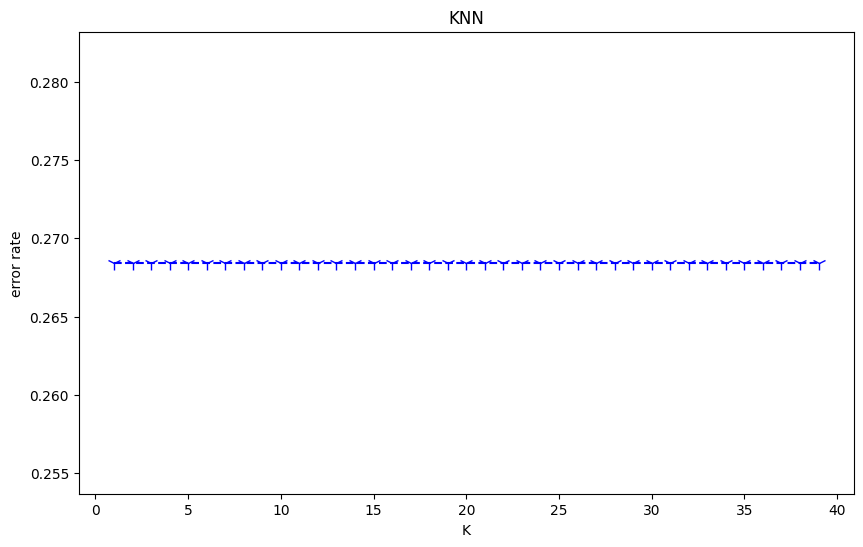

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', markersize=10, marker='1', markerfacecolor='red')
plt.title('KNN')
plt.xlabel('K')
plt.ylabel('error rate')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score = accuracy_score(ytest, ypred)
print(accuracy_score)

0.731561091831978
